In [1]:
import cv2

from skimage.segmentation import slic
from skimage.util import img_as_float

import numpy as np

from keras.models import load_model

from keras import backend as K

import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\Usrer\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Usrer\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Usrer\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Usrer\Anaconda3\envs\tf_gpu\lib\sit

In [2]:
# input image dimensions
img_rows, img_cols = 48, 48

In [3]:
#image = cv2.imread("data/input.bmp")
image = cv2.imread("data/data_road/testing/image_2/um_000000.png")

segments = slic(img_as_float(image), n_segments = 200, sigma = 5)

all_x = []

unique_segments = np.unique(segments)
for (i, segVal) in enumerate(unique_segments):
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    mask[segments == segVal] = 255

    m = cv2.moments(mask, True);

    x = m["m10"]/m["m00"]
    y = m["m01"]/m["m00"]

    img = cv2.bitwise_and(image, image, mask = mask)

    #crop
    img = img[int(y - img_rows/2) : int(y + img_rows/2), int(x - img_cols/2) : int(x + img_cols/2)]

    old_size = img.shape[:2]
    delta_w = img_cols - old_size[1]#img.cols
    delta_h = img_rows - old_size[0]#img.rows
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)

    all_x.append([img])
    
all_x = np.concatenate(all_x)

In [4]:
if K.image_data_format() == 'channels_first':
    all_x = all_x.reshape(all_x.shape[0], 3, img_rows, img_cols)
else:
    all_x = all_x.reshape(all_x.shape[0], img_rows, img_cols, 3)

all_x = all_x.astype('float32')
all_x /= 255


model = load_model('my_model.h5')

ynew = model.predict_classes(all_x)

In [5]:
print(ynew)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0
 1 0 0 0]


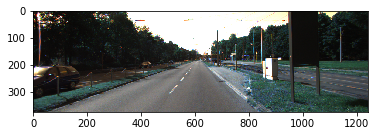

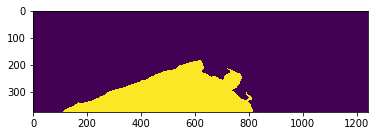

In [6]:
mask = np.zeros(image.shape[:2], dtype = "uint8")

for (i, segVal) in enumerate(unique_segments):
    if ynew[i] == 0:
        continue
    mask[segments == segVal] = 255
    
plt.figure()
plt.imshow(image)
plt.figure()
plt.imshow(mask)